<a href="https://colab.research.google.com/github/RheedWhan/SHG-analysis./blob/main/Splendor_Hotel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_excel('/content/drive/MyDrive/my csv/drive-download-20231124T184457Z-001/SHG_Booking_Data.xlsx', index_col=False)
df.head()

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss
0,1,Resort,2014-07-24,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
1,2,Resort,2013-06-24,2015-07-01,737,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
2,3,Resort,2015-06-24,2015-07-01,7,1,1,Direct,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0
3,4,Resort,2015-06-18,2015-07-01,13,1,1,Corporate,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0
4,5,Resort,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,98.0,Check-Out,2015-07-03,0,196.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Booking ID            119390 non-null  int64         
 1   Hotel                 119390 non-null  object        
 2   Booking Date          119390 non-null  datetime64[ns]
 3   Arrival Date          119390 non-null  datetime64[ns]
 4   Lead Time             119390 non-null  int64         
 5   Nights                119390 non-null  int64         
 6   Guests                119390 non-null  int64         
 7   Distribution Channel  119390 non-null  object        
 8   Customer Type         119390 non-null  object        
 9   Country               118902 non-null  object        
 10  Deposit Type          119390 non-null  object        
 11  Avg Daily Rate        119390 non-null  float64       
 12  Status                119390 non-null  object        
 13 

In [6]:
df.describe()

,Booking ID,Lead Time,Nights,Guests,Avg Daily Rate,Cancelled (0/1),Revenue,Revenue Loss
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,59695.500000,104.011416,3.427900,1.968239,101.831122,0.370416,247.931966,-109.916242
std,34465.068657,106.863097,2.557439,0.722394,50.535790,0.482918,300.921393,277.102641
min,1.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,-63.800000,-6300.000000
25%,29848.250000,18.000000,2.000000,2.000000,69.290000,0.000000,0.000000,0.000000
50%,59695.500000,69.000000,3.000000,2.000000,94.575000,0.000000,176.000000,0.000000
75%,89542.750000,160.000000,4.000000,2.000000,126.000000,1.000000,342.977500,0.000000
max,119390.000000,737.000000,69.000000,55.000000,5400.000000,1.000000,7590.000000,0.000000


Avg Daily Rate has a negative value which is odd

In [13]:
df.isna().sum()

Booking ID                0
Hotel                     0
Booking Date              0
Arrival Date              0
Lead Time                 0
Nights                    0
Guests                    0
Distribution Channel      0
Customer Type             0
Country                 488
Deposit Type              0
Avg Daily Rate            0
Status                    0
Status Update             0
Cancelled (0/1)           0
Revenue                   0
Revenue Loss              0
dtype: int64

In [20]:
df[df['Country'].isna()]

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss
30,31,Resort,2015-03-05,2015-07-01,118,14,1,Direct,Transient,NaN,No Deposit,62.0,Check-Out,2015-07-15,0,868.0,0.0
4127,4128,Resort,2016-02-15,2016-02-15,0,0,0,Offline Travel Agent,Transient,NaN,No Deposit,0.0,Canceled,2016-02-15,1,0.0,0.0
7092,7093,Resort,2016-07-13,2016-07-21,8,1,1,Corporate,Transient,NaN,No Deposit,73.0,Canceled,2016-07-20,1,0.0,-73.0
7860,7861,Resort,2016-07-22,2016-08-30,39,5,2,Direct,Transient,NaN,No Deposit,159.0,Canceled,2016-07-22,1,0.0,-795.0
8779,8780,Resort,2016-10-13,2016-10-13,0,1,1,Corporate,Transient,NaN,No Deposit,50.0,Canceled,2016-10-13,1,0.0,-50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65908,65909,City,2017-04-10,2017-04-10,0,0,0,Corporate,Transient,NaN,No Deposit,0.0,Canceled,2017-04-10,1,0.0,0.0
65909,65910,City,2017-04-10,2017-04-10,0,0,0,Corporate,Transient,NaN,No Deposit,0.0,Canceled,2017-04-10,1,0.0,0.0
65910,65911,City,2017-04-10,2017-04-10,0,0,0,Corporate,Transient,NaN,No Deposit,0.0,Canceled,2017-04-10,1,0.0,0.0
80830,80831,City,2015-11-19,2015-11-23,4,3,1,Online Travel Agent,Transient-Party,NaN,No Deposit,70.0,Check-Out,2015-11-26,0,210.0,0.0


In [21]:
# Drop missing values

df.dropna()

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss
0,1,Resort,2014-07-24,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,0.00,Check-Out,2015-07-01,0,0.00,0.0
1,2,Resort,2013-06-24,2015-07-01,737,0,2,Direct,Transient,Portugal,No Deposit,0.00,Check-Out,2015-07-01,0,0.00,0.0
2,3,Resort,2015-06-24,2015-07-01,7,1,1,Direct,Transient,United Kingdom,No Deposit,75.00,Check-Out,2015-07-02,0,75.00,0.0
3,4,Resort,2015-06-18,2015-07-01,13,1,1,Corporate,Transient,United Kingdom,No Deposit,75.00,Check-Out,2015-07-02,0,75.00,0.0
4,5,Resort,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,98.00,Check-Out,2015-07-03,0,196.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,119386,City,2017-08-07,2017-08-30,23,7,2,Offline Travel Agent,Transient,Belgium,No Deposit,96.14,Check-Out,2017-09-06,0,672.98,0.0
119386,119387,City,2017-05-21,2017-08-31,102,7,3,Online Travel Agent,Transient,France,No Deposit,225.43,Check-Out,2017-09-07,0,1578.01,0.0
119387,119388,City,2017-07-28,2017-08-31,34,7,2,Online Travel Agent,Transient,Germany,No Deposit,157.71,Check-Out,2017-09-07,0,1103.97,0.0
119388,119389,City,2017-05-14,2017-08-31,109,7,2,Online Travel Agent,Transient,United Kingdom,No Deposit,104.40,Check-Out,2017-09-07,0,730.80,0.0


In [22]:
df.corr()

<ipython-input-22-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Booking ID,Lead Time,Nights,Guests,Avg Daily Rate,Cancelled (0/1),Revenue,Revenue Loss
Booking ID,1.000000,0.006708,-0.210515,-0.023034,0.147357,-0.242238,0.082039,0.223770
Lead Time,0.006708,1.000000,0.157167,0.072265,-0.063077,0.293123,0.045773,-0.055487
Nights,-0.210515,0.157167,1.000000,0.115463,0.067945,0.017779,0.496060,-0.368046
Guests,-0.023034,0.072265,0.115463,1.000000,0.368105,0.046522,0.155087,-0.181168
Avg Daily Rate,0.147357,-0.063077,0.067945,0.368105,1.000000,0.047557,0.363388,-0.291212
Cancelled (0/1),-0.242238,0.293123,0.017779,0.046522,0.047557,1.000000,-0.424228,-0.517136
Revenue,0.082039,0.045773,0.496060,0.155087,0.363388,-0.424228,1.000000,0.326817
Revenue Loss,0.223770,-0.055487,-0.368046,-0.181168,-0.291212,-0.517136,0.326817,1.000000


<ipython-input-9-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

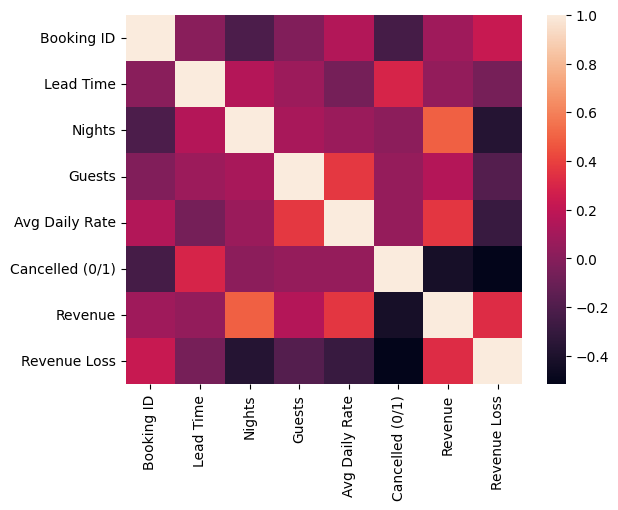

In [9]:
sns.heatmap(df.corr())

In [10]:
df.columns

Index(['Booking ID', 'Hotel', 'Booking Date', 'Arrival Date', 'Lead Time',
       'Nights', 'Guests', 'Distribution Channel', 'Customer Type', 'Country',
       'Deposit Type', 'Avg Daily Rate', 'Status', 'Status Update',
       'Cancelled (0/1)', 'Revenue', 'Revenue Loss'],
      dtype='object')

In [23]:
df[df['Avg Daily Rate'] < 0]

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss
14969,14970,Resort,2016-08-22,2017-03-05,195,10,2,Direct,Transient-Party,United Kingdom,No Deposit,-6.38,Check-Out,2017-03-15,0,-63.8,0.0
